In [20]:
import os
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio
import pandas as pd
import seaborn as sns
from pandas import ExcelWriter
from pandas import ExcelFile
import sample_utils

%matplotlib inline

# TRUE DATA

In [21]:
file_path = '2020_LER_20201102_testset_V04.xlsx'

data = np.load('../data_handler/'+file_path+'.npy', allow_pickle=True)
num_in_cycle = [250]*10
num_of_cycle = 10
    
X_all, Y_all, X_per_cycle, Y_per_cycle = data[0], data[1], data[2], data[3]
print(data[0].shape, data[1].shape, data[2].shape, data[3].shape)
print()
test_real = Y_all

# for pair plot indexing
test_X_cycle = X_per_cycle

y_mean = np.mean(Y_all, axis=0, dtype=np.float32)
y_std = np.std(Y_all, axis=0, dtype=np.float32)

print("!! check !! test real shape", test_real.shape)
print("!! check !! X value ( especially its precision )")
print()
for i in range(num_of_cycle):
    print(test_X_cycle[i])

(2500, 5) (2500, 6) (10, 5) (10, 6)

!! check !! test real shape (2500, 6)
!! check !! X value ( especially its precision )

[  0.62484672  17.00743225 173.85718891   1.           0.        ]
[ 0.55654727 80.91905766 80.56986979  1.          0.        ]
[ 0.50466944 48.62398816 67.99380535  1.          0.        ]
[ 0.56045148 25.42868151 69.39740975  1.          0.        ]
[ 0.63730798 69.14860261 65.33037708  1.          0.        ]
[  0.72951307  89.39156879 205.62484728   1.           0.        ]
[ 0.15273618 23.32639122 51.25326965  1.          0.        ]
[ 0.68988283 85.08858437 80.98368203  1.          0.        ]
[ 0.25925637 78.12653757 28.08679576  1.          0.        ]
[1.41144023e-01 9.67099798e+01 1.86683747e+02 1.00000000e+00 0.00000000e+00]


# GENERATED DATA
### Please put your sampled data file(in .npy) in the same directory

In [22]:
########################################  CHANGE HERE ####################################################################

result = 'test_specificnaive_date_210130_data_2020_LER_20201008_V008.xlsx_model_mlp_gan1_seed_0_lr_5e-05_0.0001_0.0001_hidden_dim_100_50_batch_size_32_noise_d_100_sample_num_125_tr_num_in_cycle_50_pdrop_0.9.npy'

##########################################################################################################################

test_gen = np.load(result, allow_pickle=True)

num_of_cycle = 10


test_gen_sample_num = int(test_gen.shape[0]/num_of_cycle)

print("test data sample num", test_gen_sample_num)
print("test data shape", test_gen.shape)


test data sample num 125
test data shape (1250, 6)


In [23]:
test_gen

array([[2.24069267e-12, 4.21214907e-05, 1.59167348e-05, 3.41839882e-01, 3.49920064e-01, 6.16865033e+01],
       [1.02125869e-12, 4.02434127e-05, 1.67692419e-05, 3.57177986e-01, 3.65453687e-01, 6.11401550e+01],
       [1.02748398e-12, 3.77353790e-05, 1.40950835e-05, 3.56796675e-01, 3.63505946e-01, 6.10434789e+01],
       ...,
       [2.52240445e-12, 4.35987972e-05, 1.71316381e-05, 3.38279906e-01, 3.45957351e-01, 6.17674474e+01],
       [2.07823492e-12, 4.30671191e-05, 1.65293120e-05, 3.41670982e-01, 3.49706661e-01, 6.15049018e+01],
       [3.06838612e-12, 4.41332895e-05, 1.76288938e-05, 3.34663727e-01, 3.44120807e-01, 6.20244565e+01]])

# EMD integral

In [64]:
# def EMD_true_vs_true(test_real, num_of_cycle, num_in_cycle, num_in_cycle_sub_1, num_in_cycle_sub_2, seed, verbose=False):
    
#     print("seed: ", seed)
#     np.random.seed(seed)
#     cumul = 0
#     test_real_split = []
#     for i in range(num_of_cycle):
#         test_real_split.append(test_real[cumul:cumul+num_in_cycle[i]])
#         cumul += num_in_cycle[i]


#     #num_in_cycle_sub_1 = 25
#     num_in_real_list_sub_1 = [num_in_cycle_sub_1]*num_of_cycle
#     test_real_split_sub_1 = []
#     for i in range(num_of_cycle):
#         sub_1_index = np.random.choice(num_in_cycle[i], num_in_cycle_sub_1, replace=False)
#         test_real_split_sub_1.append(test_real_split[i][sub_1_index])
#     test_real_sub_1 = np.concatenate(np.array(test_real_split_sub_1))


#     #num_in_cycle_sub_2 = 25
#     num_in_real_list_sub_2 = [num_in_cycle_sub_2]*num_of_cycle
#     test_real_split_sub_2 = []
#     for i in range(num_of_cycle):
#         sub_2_index = np.random.choice(num_in_cycle[i], num_in_cycle_sub_2, replace=False)
#         test_real_split_sub_2.append(test_real_split[i][sub_2_index])
#     test_real_sub_2 = np.concatenate(np.array(test_real_split_sub_2))
    
#     min1_per_out_v = test_real_sub_1.min(axis=0)
#     max1_per_out_v = test_real_sub_1.max(axis=0)
#     print("minimum y value for each varaible:", min1_per_out_v)
#     print("maximum y value for each varaible:", max1_per_out_v)

#     min2_per_out_v = test_real_sub_2.min(axis=0)
#     max2_per_out_v = test_real_sub_2.max(axis=0)
#     print("minimum y value for each varaible:", min2_per_out_v)
#     print("maximum y value for each varaible:", max2_per_out_v)

#     min_per_out_v = np.minimum(min1_per_out_v, min2_per_out_v)
#     max_per_out_v = np.maximum(max1_per_out_v, max2_per_out_v)
    
    
#     # EMD  
#     EMD_1d_score_list, EMD_2d_score_list = sample_utils.EMD_all_pair_each_X_integral(generated_samples = test_real_sub_1, real_samples = test_real_sub_2, num_coordinate=10, num_of_cycle=num_of_cycle, num_in_gen_list=num_in_real_list_sub_1, num_in_real_list = num_in_real_list_sub_2,  min_list = min_per_out_v, max_list = max_per_out_v) 

#     print(EMD_1d_score_list.shape)
#     print(EMD_2d_score_list.shape)

#     EMD_score_cat = np.hstack((EMD_1d_score_list, EMD_2d_score_list))

#     EMD_score = np.mean(EMD_score_cat)
#     EMD_score_list_integral = np.mean(EMD_score_cat,axis=1)
#     EMD_std = np.sqrt(np.mean((EMD_score - EMD_score_list_integral)**2))

#     for i in range(len(EMD_score_list_integral)):        
#         print("EMD_score for each X factor {} \t score {:5f} \t dev {:5f}".format(i, EMD_score_list_integral[i], (EMD_score_list_integral[i]-EMD_score)/EMD_std))
#     # A: Ioff, B: IDSat, C: IDlin, D: VTsat, E:VTlin, F:SS, G: classs

#     EMD_score_list = np.array(EMD_score_list_integral)

#     print("EMD argsort: ", EMD_score_list.argsort())
    
#     return EMD_score_list

def EMD_true_vs_true(test_real, num_of_cycle, num_in_cycle, num_in_cycle_sub_1, num_in_cycle_sub_2, seed, verbose=False):
    
    print("seed: ", seed)
    np.random.seed(seed)
    cumul = 0
    test_real_split = []
    for i in range(num_of_cycle):
        test_real_split.append(test_real[cumul:cumul+num_in_cycle[i]])
        cumul += num_in_cycle[i]


    #num_in_cycle_sub_1 = 25
    num_in_real_list_sub_1 = [num_in_cycle_sub_1]*num_of_cycle
    test_real_split_sub_1 = []
    for i in range(num_of_cycle):
        sub_1_index = np.random.choice(num_in_cycle[i], num_in_cycle_sub_1, replace=False)
        test_real_split_sub_1.append(test_real_split[i][sub_1_index])
    test_real_sub_1 = np.concatenate(np.array(test_real_split_sub_1))


    #num_in_cycle_sub_2 = 25
    num_in_real_list_sub_2 = [num_in_cycle_sub_2]*num_of_cycle
    test_real_split_sub_2 = []
    for i in range(num_of_cycle):
        sub_2_index = np.random.choice(num_in_cycle[i], num_in_cycle_sub_2, replace=False)
        test_real_split_sub_2.append(test_real_split[i][sub_2_index])
    test_real_sub_2 = np.concatenate(np.array(test_real_split_sub_2))
    
    min1_per_out_v = test_real_sub_1.min(axis=0)
    max1_per_out_v = test_real_sub_1.max(axis=0)
    print("minimum y value for each varaible:", min1_per_out_v)
    print("maximum y value for each varaible:", max1_per_out_v)

    min2_per_out_v = test_real_sub_2.min(axis=0)
    max2_per_out_v = test_real_sub_2.max(axis=0)
    print("minimum y value for each varaible:", min2_per_out_v)
    print("maximum y value for each varaible:", max2_per_out_v)

    min_per_out_v = np.minimum(min1_per_out_v, min2_per_out_v)
    max_per_out_v = np.maximum(max1_per_out_v, max2_per_out_v)
    
    
    # EMD  
    EMD_1d_score_list, EMD_2d_score_list = sample_utils.EMD_all_pair_each_X_integral(generated_samples = test_real_sub_1, real_samples = test_real_sub_2, num_coordinate=10, num_of_cycle=num_of_cycle, num_in_gen_list=num_in_real_list_sub_1, num_in_real_list = num_in_real_list_sub_2,  min_list = min_per_out_v, max_list = max_per_out_v) 

    print(EMD_1d_score_list.shape)
    print(EMD_2d_score_list.shape)

    EMD_score_cat = np.hstack((EMD_1d_score_list, EMD_2d_score_list))

    EMD_score = np.mean(EMD_score_cat)
    EMD_score_list_integral = np.mean(EMD_score_cat,axis=1)
    EMD_std = np.sqrt(np.mean((EMD_score - EMD_score_list_integral)**2))

    EMD_element = np.zeros((num_of_cycle, 3))
    for i in range(len(EMD_score_list_integral)):
        EMD_element[i, 0] = i
        EMD_element[i, 1] = num_in_cycle_sub_1
        EMD_element[i, 2] = EMD_score_list_integral[i]
        
        print("EMD_score for each X factor {} \t score {:5f} \t dev {:5f}".format(i, EMD_score_list_integral[i], (EMD_score_list_integral[i]-EMD_score)/EMD_std))
        
    # A: Ioff, B: IDSat, C: IDlin, D: VTsat, E:VTlin, F:SS, G: classs

    EMD_score_list = np.array(EMD_score_list_integral)

    print("EMD argsort: ", EMD_score_list.argsort())
    
    return EMD_score_list, EMD_element

def EMD_fake_vs_true(test_gen, test_real, num_of_cycle, num_in_cycle, num_in_cycle_sub_1, num_in_cycle_sub_2, test_gen_sample_num):

    cumul = 0
    cumul_gen = 0
    test_real_split = []
    test_gen_split = []
    for i in range(num_of_cycle):
        test_real_split.append(test_real[cumul:cumul+num_in_cycle[i]])
        test_gen_split.append(test_gen[cumul_gen:cumul_gen+test_gen_sample_num])
        cumul += num_in_cycle[i]
        cumul_gen += test_gen_sample_num

    #num_in_cycle_sub_1 = 25
    num_in_gen_list_sub_1 = [num_in_cycle_sub_1]*num_of_cycle
    test_gen_split_sub_1 = []
    for i in range(num_of_cycle):
        sub_1_index = np.random.choice(test_gen_sample_num, num_in_cycle_sub_1, replace=False)
        test_gen_split_sub_1.append(test_gen_split[i][sub_1_index])
    test_gen_sub_1 = np.concatenate(np.array(test_gen_split_sub_1))


    #num_in_cycle_sub_2 = 25
    num_in_real_list_sub_2 = [num_in_cycle_sub_2]*num_of_cycle
    test_real_split_sub_2 = []
    for i in range(num_of_cycle):
        sub_2_index = np.random.choice(num_in_cycle[i], num_in_cycle_sub_2, replace=False)
        test_real_split_sub_2.append(test_real_split[i][sub_2_index])
    test_real_sub_2 = np.concatenate(np.array(test_real_split_sub_2))
    
    
    min1_per_out_v = test_gen_sub_1.min(axis=0)
    max1_per_out_v = test_gen_sub_1.max(axis=0)
    print("minimum y value for each varaible:", min1_per_out_v)
    print("maximum y value for each varaible:", max1_per_out_v)

    min2_per_out_v = test_real_sub_2.min(axis=0)
    max2_per_out_v = test_real_sub_2.max(axis=0)
    print("minimum y value for each varaible:", min2_per_out_v)
    print("maximum y value for each varaible:", max2_per_out_v)

    min_per_out_v = np.minimum(min1_per_out_v, min2_per_out_v)
    max_per_out_v = np.maximum(max1_per_out_v, max2_per_out_v)
    
    # EMD  
    EMD_1d_score_list, EMD_2d_score_list = sample_utils.EMD_all_pair_each_X_integral(generated_samples = test_gen_sub_1, real_samples = test_real_sub_2, num_coordinate=10, num_of_cycle=num_of_cycle, num_in_gen_list=num_in_gen_list_sub_1, num_in_real_list = num_in_real_list_sub_2, min_list = min_per_out_v, max_list = max_per_out_v) 

    print(EMD_1d_score_list.shape)
    print(EMD_2d_score_list.shape)

    EMD_score_cat = np.hstack((EMD_1d_score_list, EMD_2d_score_list))

    EMD_score = np.mean(EMD_score_cat)
    EMD_score_list_integral = np.mean(EMD_score_cat,axis=1)
    EMD_std = np.sqrt(np.mean((EMD_score - EMD_score_list_integral)**2))

    for i in range(len(EMD_score_list_integral)):
        print("EMD_score for each X factor {} \t score {:5f} \t dev {:5f}".format(i, EMD_score_list_integral[i], (EMD_score_list_integral[i]-EMD_score)/EMD_std))
    # A: Ioff, B: IDSat, C: IDlin, D: VTsat, E:VTlin, F:SS, G: classs

    EMD_score_list = np.array(EMD_score_list_integral)

    print("EMD argsort: ", EMD_score_list.argsort())
    
    return EMD_score_list

In [28]:
np.set_printoptions(linewidth=1000)

In [65]:
seed = 4
EMD_score_list, EMD_element = EMD_true_vs_true(test_real, num_of_cycle, num_in_cycle, num_in_cycle_sub_1=25, num_in_cycle_sub_2=25, seed=seed)
EMD_element

seed:  4
minimum y value for each varaible: [3.0220e-13 2.8550e-05 1.1500e-05 3.2400e-01 3.3600e-01 6.0799e+01]
maximum y value for each varaible: [5.9720e-12 4.5630e-05 1.8540e-05 3.9400e-01 3.9700e-01 6.3371e+01]
minimum y value for each varaible: [5.3770e-13 3.4060e-05 1.3260e-05 3.2000e-01 3.3400e-01 6.0822e+01]
maximum y value for each varaible: [7.8870e-12 4.4440e-05 1.8600e-05 3.7500e-01 3.7800e-01 6.3717e+01]
(10, 6)
(10, 15)
EMD_score for each X factor 0 	 score 0.280961 	 dev 0.146159
EMD_score for each X factor 1 	 score 0.275965 	 dev 0.106823
EMD_score for each X factor 2 	 score 0.286349 	 dev 0.188586
EMD_score for each X factor 3 	 score 0.327253 	 dev 0.510668
EMD_score for each X factor 4 	 score 0.231800 	 dev -0.240944
EMD_score for each X factor 5 	 score 0.247735 	 dev -0.115466
EMD_score for each X factor 6 	 score 0.103130 	 dev -1.254106
EMD_score for each X factor 7 	 score 0.581336 	 dev 2.511354
EMD_score for each X factor 8 	 score 0.139920 	 dev -0.964416


array([[ 0.        , 25.        ,  0.28096114],
       [ 1.        , 25.        ,  0.27596547],
       [ 2.        , 25.        ,  0.28634923],
       [ 3.        , 25.        ,  0.32725301],
       [ 4.        , 25.        ,  0.23179989],
       [ 5.        , 25.        ,  0.24773522],
       [ 6.        , 25.        ,  0.10313038],
       [ 7.        , 25.        ,  0.58133605],
       [ 8.        , 25.        ,  0.13992034],
       [ 9.        , 25.        ,  0.14954149]])

In [30]:
EMD_fake_vs_true(test_gen, test_real, num_of_cycle, num_in_cycle, num_in_cycle_sub_1=25, num_in_cycle_sub_2=25, test_gen_sample_num=test_gen_sample_num)

minimum y value for each varaible: [9.91650808e-13 3.23067481e-05 1.32603446e-05 3.21485805e-01 3.36926860e-01 6.10434789e+01]
maximum y value for each varaible: [5.88499439e-12 4.54575829e-05 1.88444640e-05 3.69978389e-01 3.78323423e-01 6.32741862e+01]
minimum y value for each varaible: [4.7470e-13 3.2360e-05 1.2840e-05 3.2400e-01 3.3700e-01 6.0842e+01]
maximum y value for each varaible: [5.5450e-12 4.5630e-05 1.8520e-05 3.7800e-01 3.8200e-01 6.2839e+01]
(10, 6)
(10, 15)
EMD_score for each X factor 0 	 score 0.296647 	 dev -0.301159
EMD_score for each X factor 1 	 score 0.350553 	 dev 0.034910
EMD_score for each X factor 2 	 score 0.636263 	 dev 1.816108
EMD_score for each X factor 3 	 score 0.284546 	 dev -0.376599
EMD_score for each X factor 4 	 score 0.501470 	 dev 0.975771
EMD_score for each X factor 5 	 score 0.422834 	 dev 0.485533
EMD_score for each X factor 6 	 score 0.125401 	 dev -1.368752
EMD_score for each X factor 7 	 score 0.497995 	 dev 0.954106
EMD_score for each X fac

array([0.29664655, 0.35055306, 0.63626255, 0.2845458 , 0.50146994, 0.42283431, 0.12540136, 0.49799486, 0.14652054, 0.18730488])

In [31]:
num_in_cycle

[250, 250, 250, 250, 250, 250, 250, 250, 250, 250]

In [33]:
true_vs_true_search_range = [5, 10, 25, 50, 75, 100, 125, 200, 230]
true_vs_true_EMDs_set = np.zeros((len(true_vs_true_search_range),num_of_cycle))
seed = 4
for i in range(len(true_vs_true_search_range)) :
    print('i',i)
    num_in_cycle_sub = true_vs_true_search_range[i]
    true_vs_true_EMDs_set[i] = EMD_true_vs_true(test_real, num_of_cycle, num_in_cycle, num_in_cycle_sub_1=num_in_cycle_sub, num_in_cycle_sub_2=num_in_cycle_sub, seed=seed)

i 0
seed:  4
minimum y value for each varaible: [9.0010e-13 3.6600e-05 1.3990e-05 3.2600e-01 3.3800e-01 6.0936e+01]
maximum y value for each varaible: [5.7070e-12 4.4960e-05 1.8380e-05 3.6100e-01 3.6900e-01 6.3288e+01]
minimum y value for each varaible: [6.7240e-13 3.4060e-05 1.4170e-05 3.2600e-01 3.3700e-01 6.0895e+01]
maximum y value for each varaible: [5.2660e-12 4.3990e-05 1.7950e-05 3.6900e-01 3.7400e-01 6.2985e+01]
(10, 6)
(10, 15)
EMD_score for each X factor 0 	 score 0.306648 	 dev -0.588085
EMD_score for each X factor 1 	 score 0.550667 	 dev 0.047851
EMD_score for each X factor 2 	 score 1.264270 	 dev 1.907565
EMD_score for each X factor 3 	 score 0.980420 	 dev 1.167826
EMD_score for each X factor 4 	 score 0.585717 	 dev 0.139195
EMD_score for each X factor 5 	 score 0.924456 	 dev 1.021978
EMD_score for each X factor 6 	 score 0.069655 	 dev -1.205709
EMD_score for each X factor 7 	 score 0.267837 	 dev -0.689231
EMD_score for each X factor 8 	 score 0.236840 	 dev -0.770

(10, 6)
(10, 15)
EMD_score for each X factor 0 	 score 0.057111 	 dev 0.603599
EMD_score for each X factor 1 	 score 0.032717 	 dev -0.363476
EMD_score for each X factor 2 	 score 0.045084 	 dev 0.126805
EMD_score for each X factor 3 	 score 0.104268 	 dev 2.473034
EMD_score for each X factor 4 	 score 0.041709 	 dev -0.007014
EMD_score for each X factor 5 	 score 0.046749 	 dev 0.192810
EMD_score for each X factor 6 	 score 0.023826 	 dev -0.715957
EMD_score for each X factor 7 	 score 0.041752 	 dev -0.005286
EMD_score for each X factor 8 	 score 0.020094 	 dev -0.863867
EMD_score for each X factor 9 	 score 0.005545 	 dev -1.440647
EMD argsort:  [9 8 6 1 4 7 2 5 0 3]


In [34]:
print(true_vs_true_EMDs_set)

[[0.30664798 0.55066722 1.26427023 0.98042021 0.58571723 0.92445583 0.06965517 0.26783652 0.23683954 0.13654947]
 [0.43396221 0.6762817  0.26820112 0.301957   0.32958453 0.4876712  0.11724648 0.28851033 0.16751935 0.19038707]
 [0.28096114 0.27596547 0.28634923 0.32725301 0.23179989 0.24773522 0.10313038 0.58133605 0.13992034 0.14954149]
 [0.15592169 0.21805395 0.23757387 0.30358292 0.19335548 0.16388497 0.04234851 0.27166663 0.07848548 0.04661703]
 [0.12863085 0.23128411 0.19325939 0.21543179 0.12569191 0.12546033 0.08548498 0.10441113 0.11397079 0.04510782]
 [0.12093794 0.26790179 0.20695195 0.0843549  0.12676807 0.13445801 0.07951732 0.18778949 0.04952295 0.02679258]
 [0.13768808 0.27256393 0.23639047 0.17977582 0.08807756 0.0751203  0.06837051 0.18625708 0.05641647 0.01912183]
 [0.05556313 0.06138903 0.06791443 0.07648759 0.04955735 0.08694392 0.04215966 0.04826877 0.02973301 0.01928713]
 [0.05711129 0.03271684 0.04508418 0.10426778 0.04170858 0.04674914 0.0238255  0.04175218 0.0200

In [35]:
true_vs_true_EMDs_set

array([[0.30664798, 0.55066722, 1.26427023, 0.98042021, 0.58571723, 0.92445583, 0.06965517, 0.26783652, 0.23683954, 0.13654947],
       [0.43396221, 0.6762817 , 0.26820112, 0.301957  , 0.32958453, 0.4876712 , 0.11724648, 0.28851033, 0.16751935, 0.19038707],
       [0.28096114, 0.27596547, 0.28634923, 0.32725301, 0.23179989, 0.24773522, 0.10313038, 0.58133605, 0.13992034, 0.14954149],
       [0.15592169, 0.21805395, 0.23757387, 0.30358292, 0.19335548, 0.16388497, 0.04234851, 0.27166663, 0.07848548, 0.04661703],
       [0.12863085, 0.23128411, 0.19325939, 0.21543179, 0.12569191, 0.12546033, 0.08548498, 0.10441113, 0.11397079, 0.04510782],
       [0.12093794, 0.26790179, 0.20695195, 0.0843549 , 0.12676807, 0.13445801, 0.07951732, 0.18778949, 0.04952295, 0.02679258],
       [0.13768808, 0.27256393, 0.23639047, 0.17977582, 0.08807756, 0.0751203 , 0.06837051, 0.18625708, 0.05641647, 0.01912183],
       [0.05556313, 0.06138903, 0.06791443, 0.07648759, 0.04955735, 0.08694392, 0.04215966, 0.048

In [58]:

seed = 4
np.random.seed(seed)

sample = 10

seed_range = np.random.choice(1000,sample)
print("seed range: ", seed_range)

# true_vs_true_search_range = [5, 10, 25, 50, 75, 100, 125, 200, 230]
true_vs_true_search_range = [100, 200]
print("search range: ", true_vs_true_search_range)

true_vs_true_EMDs_set = np.zeros((len(seed_range), len(true_vs_true_search_range), num_of_cycle))

for j in range(len(seed_range)):
    for i in range(len(true_vs_true_search_range)) :
        print('seed: ', seed_range[j], 'search: ', true_vs_true_search_range[i])
        num_in_cycle_sub = true_vs_true_search_range[i]
        true_vs_true_EMDs_set[j, i, :] = EMD_true_vs_true(test_real, num_of_cycle, num_in_cycle, num_in_cycle_sub_1=num_in_cycle_sub, num_in_cycle_sub_2=num_in_cycle_sub, seed=seed_range[j])

seed range:  [122 174 439 709 897 360 599 456 818 393]
search range:  [100, 200]
seed:  122 search:  100
seed:  122
minimum y value for each varaible: [5.2280e-13 3.1650e-05 1.2690e-05 3.2000e-01 3.3400e-01 6.0822e+01]
maximum y value for each varaible: [7.8870e-12 4.5630e-05 1.8600e-05 3.7600e-01 3.8100e-01 6.3717e+01]
minimum y value for each varaible: [4.7470e-13 3.1240e-05 1.2840e-05 3.1800e-01 3.3000e-01 6.0799e+01]
maximum y value for each varaible: [8.3370e-12 4.5900e-05 1.8540e-05 3.7800e-01 3.8200e-01 6.3893e+01]
(10, 6)
(10, 15)
EMD_score for each X factor 0 	 score 0.164853 	 dev 0.986089
EMD_score for each X factor 1 	 score 0.229940 	 dev 2.183071
EMD_score for each X factor 2 	 score 0.080508 	 dev -0.565058
EMD_score for each X factor 3 	 score 0.123577 	 dev 0.227000
EMD_score for each X factor 4 	 score 0.106622 	 dev -0.084797
EMD_score for each X factor 5 	 score 0.136923 	 dev 0.472436
EMD_score for each X factor 6 	 score 0.050986 	 dev -1.107968
EMD_score for each

(10, 6)
(10, 15)
EMD_score for each X factor 0 	 score 0.058490 	 dev 0.464503
EMD_score for each X factor 1 	 score 0.048847 	 dev 0.034801
EMD_score for each X factor 2 	 score 0.051357 	 dev 0.146636
EMD_score for each X factor 3 	 score 0.043918 	 dev -0.184854
EMD_score for each X factor 4 	 score 0.085072 	 dev 1.649028
EMD_score for each X factor 5 	 score 0.049485 	 dev 0.063213
EMD_score for each X factor 6 	 score 0.030808 	 dev -0.769067
EMD_score for each X factor 7 	 score 0.080369 	 dev 1.439424
EMD_score for each X factor 8 	 score 0.024813 	 dev -1.036231
EMD_score for each X factor 9 	 score 0.007506 	 dev -1.807452
EMD argsort:  [9 8 6 3 1 5 2 0 7 4]
seed:  897 search:  100
seed:  897
minimum y value for each varaible: [5.9880e-13 3.1240e-05 1.2840e-05 3.1800e-01 3.3000e-01 6.0822e+01]
maximum y value for each varaible: [8.2640e-12 4.5900e-05 1.8270e-05 3.7300e-01 3.7800e-01 6.3635e+01]
minimum y value for each varaible: [4.0750e-13 2.8040e-05 1.2320e-05 3.1800e-01 3.

(10, 6)
(10, 15)
EMD_score for each X factor 0 	 score 0.066736 	 dev 0.481279
EMD_score for each X factor 1 	 score 0.067049 	 dev 0.493258
EMD_score for each X factor 2 	 score 0.065069 	 dev 0.417521
EMD_score for each X factor 3 	 score 0.042013 	 dev -0.464264
EMD_score for each X factor 4 	 score 0.103353 	 dev 1.881707
EMD_score for each X factor 5 	 score 0.064901 	 dev 0.411092
EMD_score for each X factor 6 	 score 0.007366 	 dev -1.789320
EMD_score for each X factor 7 	 score 0.068080 	 dev 0.532688
EMD_score for each X factor 8 	 score 0.026503 	 dev -1.057443
EMD_score for each X factor 9 	 score 0.030449 	 dev -0.906518
EMD argsort:  [6 8 9 3 5 2 0 1 7 4]
seed:  818 search:  100
seed:  818
minimum y value for each varaible: [4.0750e-13 2.8040e-05 1.2320e-05 3.2300e-01 3.3500e-01 6.0765e+01]
maximum y value for each varaible: [6.067e-12 4.568e-05 1.819e-05 3.820e-01 3.860e-01 6.332e+01]
minimum y value for each varaible: [4.0750e-13 2.6090e-05 1.1970e-05 3.1900e-01 3.3200e-

In [59]:
print(true_vs_true_EMDs_set.shape)

(10, 2, 10)


In [60]:
mean = np.mean(true_vs_true_EMDs_set, axis=0)
mean

array([[0.2138101 , 0.13406336, 0.11995311, 0.1346011 , 0.12580609, 0.1804907 , 0.04469235, 0.15682885, 0.07450962, 0.03810749],
       [0.0725327 , 0.05259196, 0.0601098 , 0.06391345, 0.08120161, 0.06790128, 0.01349018, 0.06777858, 0.02541239, 0.0176245 ]])

In [61]:
var = np.var(true_vs_true_EMDs_set, axis=0)
var

array([[6.38128083e-03, 1.96493875e-03, 2.35758861e-03, 4.30214686e-03, 8.10687683e-04, 6.73696018e-03, 2.58513493e-04, 2.43484452e-03, 8.80322076e-04, 2.99578798e-04],
       [2.65165127e-04, 3.21820689e-04, 4.92565149e-04, 5.70171597e-04, 5.43637153e-04, 3.66555031e-04, 4.75613745e-05, 1.82674231e-04, 5.33749662e-05, 1.23449063e-04]])

In [78]:
seed = 4
np.random.seed(seed)

sample = 20
num_of_cycle = 10
seed_range = np.random.choice(1000, sample)
print("seed range: ", seed_range)

# true_vs_true_search_range = [5, 10, 25, 50, 75, 100, 125, 200, 230]
true_vs_true_search_range = [25, 50, 75, 100, 125, 150, 175, 200]
print("search range: ", true_vs_true_search_range)

true_vs_true_EMDs_set = np.zeros((len(seed_range)*len(true_vs_true_search_range)*num_of_cycle, 3))
print(len(seed_range)*len(true_vs_true_search_range)*num_of_cycle)
        
for i in range(len(true_vs_true_search_range)):
    for j in range(len(seed_range)):
        
        num_in_cycle_sub = true_vs_true_search_range[i]
        _, EMD_element = EMD_true_vs_true(test_real, num_of_cycle, num_in_cycle, num_in_cycle_sub_1=num_in_cycle_sub, num_in_cycle_sub_2=num_in_cycle_sub, seed=seed_range[j])
        
        print(i*len(seed_range)*num_of_cycle+j*num_of_cycle)
        true_vs_true_EMDs_set[i*len(seed_range)*num_of_cycle+j*num_of_cycle:i*len(seed_range)*num_of_cycle+j*num_of_cycle+num_of_cycle,:] = EMD_element


seed range:  [122 174 439 709 897 360 599 456 818 393  58 764 871 109 606 823 951 313 872 676]
search range:  [25, 50, 75, 100, 125, 150, 175, 200]
1600
seed:  122
minimum y value for each varaible: [7.1810e-13 3.2470e-05 1.3470e-05 3.2000e-01 3.3400e-01 6.0822e+01]
maximum y value for each varaible: [7.8870e-12 4.5070e-05 1.8600e-05 3.6800e-01 3.7400e-01 6.3717e+01]
minimum y value for each varaible: [5.5160e-13 3.2630e-05 1.3280e-05 3.2300e-01 3.3500e-01 6.0799e+01]
maximum y value for each varaible: [6.050e-12 4.451e-05 1.811e-05 3.720e-01 3.780e-01 6.304e+01]
(10, 6)
(10, 15)
EMD_score for each X factor 0 	 score 0.276884 	 dev 0.242494
EMD_score for each X factor 1 	 score 0.234755 	 dev -0.148541
EMD_score for each X factor 2 	 score 0.343631 	 dev 0.862023
EMD_score for each X factor 3 	 score 0.447162 	 dev 1.822965
EMD_score for each X factor 4 	 score 0.237943 	 dev -0.118947
EMD_score for each X factor 5 	 score 0.304559 	 dev 0.499364
EMD_score for each X factor 6 	 score 0

(10, 6)
(10, 15)
EMD_score for each X factor 0 	 score 0.737220 	 dev 2.430449
EMD_score for each X factor 1 	 score 0.405082 	 dev 0.568822
EMD_score for each X factor 2 	 score 0.317399 	 dev 0.077360
EMD_score for each X factor 3 	 score 0.253998 	 dev -0.278003
EMD_score for each X factor 4 	 score 0.376383 	 dev 0.407961
EMD_score for each X factor 5 	 score 0.343031 	 dev 0.221026
EMD_score for each X factor 6 	 score 0.095357 	 dev -1.167182
EMD_score for each X factor 7 	 score 0.261735 	 dev -0.234635
EMD_score for each X factor 8 	 score 0.127786 	 dev -0.985416
EMD_score for each X factor 9 	 score 0.117980 	 dev -1.040381
EMD argsort:  [6 9 8 3 7 2 5 4 1 0]
70
seed:  818
minimum y value for each varaible: [5.9880e-13 3.2240e-05 1.3710e-05 3.2600e-01 3.3700e-01 6.1052e+01]
maximum y value for each varaible: [5.3560e-12 4.4340e-05 1.7840e-05 3.7200e-01 3.7800e-01 6.2892e+01]
minimum y value for each varaible: [4.1440e-13 2.6090e-05 1.1970e-05 3.2300e-01 3.3500e-01 6.0765e+01]

(10, 6)
(10, 15)
EMD_score for each X factor 0 	 score 0.256793 	 dev -0.321064
EMD_score for each X factor 1 	 score 0.281037 	 dev -0.194560
EMD_score for each X factor 2 	 score 0.297588 	 dev -0.108196
EMD_score for each X factor 3 	 score 0.502929 	 dev 0.963268
EMD_score for each X factor 4 	 score 0.414767 	 dev 0.503241
EMD_score for each X factor 5 	 score 0.329807 	 dev 0.059922
EMD_score for each X factor 6 	 score 0.091658 	 dev -1.182734
EMD_score for each X factor 7 	 score 0.753019 	 dev 2.268230
EMD_score for each X factor 8 	 score 0.178995 	 dev -0.727013
EMD_score for each X factor 9 	 score 0.076641 	 dev -1.261094
EMD argsort:  [9 6 8 0 1 2 5 4 3 7]
150
seed:  951
minimum y value for each varaible: [3.0220e-13 2.8550e-05 1.1500e-05 3.2700e-01 3.3700e-01 6.0927e+01]
maximum y value for each varaible: [4.8360e-12 4.5100e-05 1.7960e-05 3.9400e-01 3.9700e-01 6.2624e+01]
minimum y value for each varaible: [3.0220e-13 2.8550e-05 1.1500e-05 3.2500e-01 3.3700e-01 6.0854e+0

(10, 6)
(10, 15)
EMD_score for each X factor 0 	 score 0.156356 	 dev -0.322878
EMD_score for each X factor 1 	 score 0.194176 	 dev 0.050336
EMD_score for each X factor 2 	 score 0.304178 	 dev 1.135850
EMD_score for each X factor 3 	 score 0.140246 	 dev -0.481848
EMD_score for each X factor 4 	 score 0.191542 	 dev 0.024341
EMD_score for each X factor 5 	 score 0.281508 	 dev 0.912143
EMD_score for each X factor 6 	 score 0.048991 	 dev -1.382369
EMD_score for each X factor 7 	 score 0.379092 	 dev 1.875117
EMD_score for each X factor 8 	 score 0.146558 	 dev -0.419562
EMD_score for each X factor 9 	 score 0.048103 	 dev -1.391132
EMD argsort:  [9 6 3 8 0 4 1 5 2 7]
230
seed:  897
minimum y value for each varaible: [5.9880e-13 3.1240e-05 1.2970e-05 3.1800e-01 3.3000e-01 6.0901e+01]
maximum y value for each varaible: [8.2640e-12 4.5900e-05 1.8270e-05 3.7300e-01 3.7800e-01 6.3635e+01]
minimum y value for each varaible: [4.0750e-13 2.8040e-05 1.2320e-05 3.2400e-01 3.3600e-01 6.0765e+01

(10, 6)
(10, 15)
EMD_score for each X factor 0 	 score 0.240816 	 dev 0.427947
EMD_score for each X factor 1 	 score 0.241168 	 dev 0.431616
EMD_score for each X factor 2 	 score 0.180398 	 dev -0.201904
EMD_score for each X factor 3 	 score 0.416062 	 dev 2.254854
EMD_score for each X factor 4 	 score 0.194738 	 dev -0.052415
EMD_score for each X factor 5 	 score 0.247729 	 dev 0.500006
EMD_score for each X factor 6 	 score 0.048220 	 dev -1.579839
EMD_score for each X factor 7 	 score 0.199217 	 dev -0.005715
EMD_score for each X factor 8 	 score 0.143611 	 dev -0.585408
EMD_score for each X factor 9 	 score 0.085698 	 dev -1.189141
EMD argsort:  [6 9 8 2 4 7 0 1 5 3]
310
seed:  871
minimum y value for each varaible: [5.5160e-13 3.1820e-05 1.2970e-05 3.1900e-01 3.3200e-01 6.0799e+01]
maximum y value for each varaible: [8.3370e-12 4.4640e-05 1.8280e-05 3.7200e-01 3.7800e-01 6.3893e+01]
minimum y value for each varaible: [3.0220e-13 2.8550e-05 1.1500e-05 3.2000e-01 3.3400e-01 6.0804e+0

(10, 6)
(10, 15)
EMD_score for each X factor 0 	 score 0.244381 	 dev 1.031612
EMD_score for each X factor 1 	 score 0.206455 	 dev 0.485436
EMD_score for each X factor 2 	 score 0.216413 	 dev 0.628847
EMD_score for each X factor 3 	 score 0.220422 	 dev 0.686578
EMD_score for each X factor 4 	 score 0.117057 	 dev -0.801998
EMD_score for each X factor 5 	 score 0.239751 	 dev 0.964937
EMD_score for each X factor 6 	 score 0.062460 	 dev -1.588270
EMD_score for each X factor 7 	 score 0.190442 	 dev 0.254835
EMD_score for each X factor 8 	 score 0.189353 	 dev 0.239143
EMD_score for each X factor 9 	 score 0.040736 	 dev -1.901120
EMD argsort:  [9 6 4 8 7 1 2 3 5 0]
390
seed:  122
minimum y value for each varaible: [5.2280e-13 3.1650e-05 1.2840e-05 3.2000e-01 3.3400e-01 6.0822e+01]
maximum y value for each varaible: [7.8870e-12 4.5630e-05 1.8600e-05 3.7600e-01 3.8100e-01 6.3717e+01]
minimum y value for each varaible: [4.7470e-13 3.1240e-05 1.2900e-05 3.1800e-01 3.3000e-01 6.0799e+01]


(10, 6)
(10, 15)
EMD_score for each X factor 0 	 score 0.144744 	 dev -0.058008
EMD_score for each X factor 1 	 score 0.153963 	 dev 0.050851
EMD_score for each X factor 2 	 score 0.261554 	 dev 1.321382
EMD_score for each X factor 3 	 score 0.203742 	 dev 0.638694
EMD_score for each X factor 4 	 score 0.165795 	 dev 0.190578
EMD_score for each X factor 5 	 score 0.124169 	 dev -0.300975
EMD_score for each X factor 6 	 score 0.038684 	 dev -1.310466
EMD_score for each X factor 7 	 score 0.302115 	 dev 1.800370
EMD_score for each X factor 8 	 score 0.062006 	 dev -1.035053
EMD_score for each X factor 9 	 score 0.039793 	 dev -1.297373
EMD argsort:  [6 9 8 5 0 1 4 3 2 7]
470
seed:  818
minimum y value for each varaible: [4.0750e-13 2.8040e-05 1.2320e-05 3.2300e-01 3.3600e-01 6.0765e+01]
maximum y value for each varaible: [6.0670e-12 4.5100e-05 1.8140e-05 3.8200e-01 3.8600e-01 6.3126e+01]
minimum y value for each varaible: [4.0750e-13 2.6090e-05 1.1970e-05 3.1900e-01 3.3200e-01 6.0765e+01

(10, 6)
(10, 15)
EMD_score for each X factor 0 	 score 0.142185 	 dev -0.258190
EMD_score for each X factor 1 	 score 0.127552 	 dev -0.394352
EMD_score for each X factor 2 	 score 0.129080 	 dev -0.380129
EMD_score for each X factor 3 	 score 0.128002 	 dev -0.390158
EMD_score for each X factor 4 	 score 0.296540 	 dev 1.178055
EMD_score for each X factor 5 	 score 0.364171 	 dev 1.807352
EMD_score for each X factor 6 	 score 0.036668 	 dev -1.240010
EMD_score for each X factor 7 	 score 0.311374 	 dev 1.316086
EMD_score for each X factor 8 	 score 0.117072 	 dev -0.491862
EMD_score for each X factor 9 	 score 0.046686 	 dev -1.146792
EMD argsort:  [6 9 8 1 3 2 0 4 7 5]
550
seed:  951
minimum y value for each varaible: [3.0220e-13 2.8550e-05 1.1500e-05 3.2300e-01 3.3500e-01 6.0842e+01]
maximum y value for each varaible: [6.3350e-12 4.5520e-05 1.8750e-05 3.9400e-01 3.9700e-01 6.3285e+01]
minimum y value for each varaible: [3.0220e-13 2.8550e-05 1.1500e-05 3.1900e-01 3.3200e-01 6.0842e+

(10, 6)
(10, 15)
EMD_score for each X factor 0 	 score 0.077789 	 dev -0.361936
EMD_score for each X factor 1 	 score 0.095996 	 dev 0.008915
EMD_score for each X factor 2 	 score 0.079338 	 dev -0.330371
EMD_score for each X factor 3 	 score 0.109020 	 dev 0.274205
EMD_score for each X factor 4 	 score 0.133979 	 dev 0.782580
EMD_score for each X factor 5 	 score 0.161753 	 dev 1.348307
EMD_score for each X factor 6 	 score 0.044939 	 dev -1.031048
EMD_score for each X factor 7 	 score 0.180717 	 dev 1.734575
EMD_score for each X factor 8 	 score 0.053087 	 dev -0.865085
EMD_score for each X factor 9 	 score 0.018963 	 dev -1.560142
EMD argsort:  [9 6 8 0 2 1 3 4 5 7]
630
seed:  897
minimum y value for each varaible: [5.9880e-13 3.1240e-05 1.2840e-05 3.1800e-01 3.3000e-01 6.0822e+01]
maximum y value for each varaible: [8.2640e-12 4.5900e-05 1.8270e-05 3.7300e-01 3.7800e-01 6.3635e+01]
minimum y value for each varaible: [4.0750e-13 2.8040e-05 1.2320e-05 3.1800e-01 3.3000e-01 6.0765e+01

(10, 6)
(10, 15)
EMD_score for each X factor 0 	 score 0.378621 	 dev 2.009070
EMD_score for each X factor 1 	 score 0.133505 	 dev -0.171884
EMD_score for each X factor 2 	 score 0.086551 	 dev -0.589669
EMD_score for each X factor 3 	 score 0.301253 	 dev 1.320676
EMD_score for each X factor 4 	 score 0.121055 	 dev -0.282658
EMD_score for each X factor 5 	 score 0.166743 	 dev 0.123850
EMD_score for each X factor 6 	 score 0.033749 	 dev -1.059481
EMD_score for each X factor 7 	 score 0.232407 	 dev 0.708109
EMD_score for each X factor 8 	 score 0.042978 	 dev -0.977363
EMD_score for each X factor 9 	 score 0.031370 	 dev -1.080651
EMD argsort:  [9 6 8 2 4 1 5 7 3 0]
710
seed:  871
minimum y value for each varaible: [3.0220e-13 2.6090e-05 1.1500e-05 3.1900e-01 3.3200e-01 6.0799e+01]
maximum y value for each varaible: [8.3370e-12 4.5100e-05 1.8600e-05 3.9400e-01 3.9700e-01 6.3893e+01]
minimum y value for each varaible: [3.0220e-13 2.8040e-05 1.1500e-05 3.1900e-01 3.3200e-01 6.0804e+0

(10, 6)
(10, 15)
EMD_score for each X factor 0 	 score 0.126286 	 dev 0.212908
EMD_score for each X factor 1 	 score 0.143720 	 dev 0.552045
EMD_score for each X factor 2 	 score 0.152049 	 dev 0.714066
EMD_score for each X factor 3 	 score 0.092963 	 dev -0.435310
EMD_score for each X factor 4 	 score 0.170736 	 dev 1.077585
EMD_score for each X factor 5 	 score 0.174516 	 dev 1.151120
EMD_score for each X factor 6 	 score 0.051040 	 dev -1.250822
EMD_score for each X factor 7 	 score 0.159615 	 dev 0.861259
EMD_score for each X factor 8 	 score 0.043068 	 dev -1.405909
EMD_score for each X factor 9 	 score 0.039416 	 dev -1.476943
EMD argsort:  [9 8 6 3 0 1 2 7 4 5]
790
seed:  122
minimum y value for each varaible: [5.2280e-13 3.1650e-05 1.2690e-05 3.2000e-01 3.3400e-01 6.0765e+01]
maximum y value for each varaible: [7.8870e-12 4.5630e-05 1.8750e-05 3.7600e-01 3.8100e-01 6.3717e+01]
minimum y value for each varaible: [4.7470e-13 3.1240e-05 1.2690e-05 3.1800e-01 3.3000e-01 6.0765e+01]

(10, 6)
(10, 15)
EMD_score for each X factor 0 	 score 0.093938 	 dev -0.102506
EMD_score for each X factor 1 	 score 0.115315 	 dev 0.377010
EMD_score for each X factor 2 	 score 0.170228 	 dev 1.608794
EMD_score for each X factor 3 	 score 0.093203 	 dev -0.118976
EMD_score for each X factor 4 	 score 0.166208 	 dev 1.518616
EMD_score for each X factor 5 	 score 0.095608 	 dev -0.065042
EMD_score for each X factor 6 	 score 0.011088 	 dev -1.960948
EMD_score for each X factor 7 	 score 0.105776 	 dev 0.163040
EMD_score for each X factor 8 	 score 0.074213 	 dev -0.544954
EMD_score for each X factor 9 	 score 0.059498 	 dev -0.875034
EMD argsort:  [6 9 8 3 0 5 7 1 4 2]
870
seed:  818
minimum y value for each varaible: [4.0750e-13 2.8040e-05 1.2240e-05 3.1800e-01 3.3000e-01 6.0765e+01]
maximum y value for each varaible: [8.3370e-12 4.5900e-05 1.8380e-05 3.8200e-01 3.8600e-01 6.3893e+01]
minimum y value for each varaible: [4.0750e-13 2.6090e-05 1.1970e-05 3.1900e-01 3.3200e-01 6.0765e+0

(10, 6)
(10, 15)
EMD_score for each X factor 0 	 score 0.158295 	 dev 0.688150
EMD_score for each X factor 1 	 score 0.129394 	 dev 0.236113
EMD_score for each X factor 2 	 score 0.105121 	 dev -0.143516
EMD_score for each X factor 3 	 score 0.126419 	 dev 0.189598
EMD_score for each X factor 4 	 score 0.118528 	 dev 0.066169
EMD_score for each X factor 5 	 score 0.239158 	 dev 1.952871
EMD_score for each X factor 6 	 score 0.016999 	 dev -1.521777
EMD_score for each X factor 7 	 score 0.164989 	 dev 0.792835
EMD_score for each X factor 8 	 score 0.056106 	 dev -0.910129
EMD_score for each X factor 9 	 score 0.027962 	 dev -1.350314
EMD argsort:  [6 9 8 2 4 3 1 0 7 5]
950
seed:  951
minimum y value for each varaible: [3.0220e-13 2.6090e-05 1.1500e-05 3.1800e-01 3.3000e-01 6.0799e+01]
maximum y value for each varaible: [8.2640e-12 4.5900e-05 1.8750e-05 3.9400e-01 3.9700e-01 6.3635e+01]
minimum y value for each varaible: [3.0220e-13 2.8040e-05 1.1500e-05 3.1900e-01 3.3200e-01 6.0804e+01]

(10, 6)
(10, 15)
EMD_score for each X factor 0 	 score 0.102066 	 dev 1.125072
EMD_score for each X factor 1 	 score 0.065076 	 dev -0.051942
EMD_score for each X factor 2 	 score 0.050630 	 dev -0.511615
EMD_score for each X factor 3 	 score 0.061576 	 dev -0.163319
EMD_score for each X factor 4 	 score 0.099428 	 dev 1.041148
EMD_score for each X factor 5 	 score 0.080657 	 dev 0.443843
EMD_score for each X factor 6 	 score 0.044222 	 dev -0.715532
EMD_score for each X factor 7 	 score 0.117780 	 dev 1.625113
EMD_score for each X factor 8 	 score 0.030174 	 dev -1.162556
EMD_score for each X factor 9 	 score 0.015477 	 dev -1.630212
EMD argsort:  [9 8 6 2 3 1 5 4 0 7]
1030
seed:  897
minimum y value for each varaible: [5.3770e-13 3.1240e-05 1.2840e-05 3.1800e-01 3.3000e-01 6.0804e+01]
maximum y value for each varaible: [8.2640e-12 4.5900e-05 1.8520e-05 3.7500e-01 3.7800e-01 6.3635e+01]
minimum y value for each varaible: [4.0750e-13 2.6090e-05 1.1970e-05 3.1800e-01 3.3000e-01 6.0765e+

(10, 6)
(10, 15)
EMD_score for each X factor 0 	 score 0.190429 	 dev 1.455730
EMD_score for each X factor 1 	 score 0.057989 	 dev -0.567997
EMD_score for each X factor 2 	 score 0.051435 	 dev -0.668146
EMD_score for each X factor 3 	 score 0.214053 	 dev 1.816708
EMD_score for each X factor 4 	 score 0.112035 	 dev 0.257838
EMD_score for each X factor 5 	 score 0.152640 	 dev 0.878301
EMD_score for each X factor 6 	 score 0.037028 	 dev -0.888287
EMD_score for each X factor 7 	 score 0.078938 	 dev -0.247895
EMD_score for each X factor 8 	 score 0.038860 	 dev -0.860297
EMD_score for each X factor 9 	 score 0.018202 	 dev -1.175956
EMD argsort:  [9 6 8 2 1 7 4 5 0 3]
1110
seed:  871
minimum y value for each varaible: [3.0220e-13 2.6090e-05 1.1500e-05 3.1900e-01 3.3200e-01 6.0765e+01]
maximum y value for each varaible: [8.3370e-12 4.5680e-05 1.8600e-05 3.9400e-01 3.9700e-01 6.3893e+01]
minimum y value for each varaible: [3.0220e-13 2.6090e-05 1.1500e-05 3.1800e-01 3.3000e-01 6.0765e+

(10, 6)
(10, 15)
EMD_score for each X factor 0 	 score 0.077047 	 dev -0.262496
EMD_score for each X factor 1 	 score 0.076830 	 dev -0.266426
EMD_score for each X factor 2 	 score 0.111310 	 dev 0.359255
EMD_score for each X factor 3 	 score 0.084624 	 dev -0.124996
EMD_score for each X factor 4 	 score 0.120090 	 dev 0.518580
EMD_score for each X factor 5 	 score 0.100471 	 dev 0.162562
EMD_score for each X factor 6 	 score 0.039053 	 dev -0.951939
EMD_score for each X factor 7 	 score 0.231712 	 dev 2.544083
EMD_score for each X factor 8 	 score 0.048290 	 dev -0.784313
EMD_score for each X factor 9 	 score 0.025696 	 dev -1.194310
EMD argsort:  [9 6 8 1 0 3 5 2 4 7]
1190
seed:  122
minimum y value for each varaible: [4.0750e-13 2.8040e-05 1.2240e-05 3.1900e-01 3.3200e-01 6.0765e+01]
maximum y value for each varaible: [8.3370e-12 4.5630e-05 1.8750e-05 3.8200e-01 3.8600e-01 6.3893e+01]
minimum y value for each varaible: [4.7470e-13 3.0710e-05 1.2240e-05 3.1800e-01 3.3000e-01 6.0765e+

(10, 6)
(10, 15)
EMD_score for each X factor 0 	 score 0.098231 	 dev 0.381942
EMD_score for each X factor 1 	 score 0.067080 	 dev -0.174123
EMD_score for each X factor 2 	 score 0.126744 	 dev 0.890910
EMD_score for each X factor 3 	 score 0.041197 	 dev -0.636144
EMD_score for each X factor 4 	 score 0.212784 	 dev 2.426750
EMD_score for each X factor 5 	 score 0.070646 	 dev -0.110472
EMD_score for each X factor 6 	 score 0.009114 	 dev -1.208841
EMD_score for each X factor 7 	 score 0.077647 	 dev 0.014498
EMD_score for each X factor 8 	 score 0.029085 	 dev -0.852352
EMD_score for each X factor 9 	 score 0.035818 	 dev -0.732168
EMD argsort:  [6 8 9 3 1 5 7 0 2 4]
1270
seed:  818
minimum y value for each varaible: [4.0750e-13 2.8040e-05 1.2240e-05 3.1800e-01 3.3000e-01 6.0765e+01]
maximum y value for each varaible: [8.3370e-12 4.5900e-05 1.8520e-05 3.8200e-01 3.8600e-01 6.3893e+01]
minimum y value for each varaible: [4.0750e-13 2.6090e-05 1.1970e-05 3.1800e-01 3.3000e-01 6.0765e+

(10, 6)
(10, 15)
EMD_score for each X factor 0 	 score 0.064777 	 dev -0.110902
EMD_score for each X factor 1 	 score 0.096200 	 dev 0.580761
EMD_score for each X factor 2 	 score 0.040091 	 dev -0.654284
EMD_score for each X factor 3 	 score 0.085257 	 dev 0.339897
EMD_score for each X factor 4 	 score 0.082818 	 dev 0.286213
EMD_score for each X factor 5 	 score 0.078561 	 dev 0.192500
EMD_score for each X factor 6 	 score 0.006168 	 dev -1.400975
EMD_score for each X factor 7 	 score 0.177980 	 dev 2.380857
EMD_score for each X factor 8 	 score 0.040617 	 dev -0.642699
EMD_score for each X factor 9 	 score 0.025685 	 dev -0.971368
EMD argsort:  [6 9 2 8 0 5 4 3 1 7]
1350
seed:  951
minimum y value for each varaible: [3.0220e-13 2.6090e-05 1.1500e-05 3.1800e-01 3.3000e-01 6.0765e+01]
maximum y value for each varaible: [8.2640e-12 4.5900e-05 1.8750e-05 3.9400e-01 3.9700e-01 6.3635e+01]
minimum y value for each varaible: [3.0220e-13 2.8040e-05 1.1500e-05 3.1900e-01 3.3200e-01 6.0799e+0

(10, 6)
(10, 15)
EMD_score for each X factor 0 	 score 0.058490 	 dev 0.464503
EMD_score for each X factor 1 	 score 0.048847 	 dev 0.034801
EMD_score for each X factor 2 	 score 0.051357 	 dev 0.146636
EMD_score for each X factor 3 	 score 0.043918 	 dev -0.184854
EMD_score for each X factor 4 	 score 0.085072 	 dev 1.649028
EMD_score for each X factor 5 	 score 0.049485 	 dev 0.063213
EMD_score for each X factor 6 	 score 0.030808 	 dev -0.769067
EMD_score for each X factor 7 	 score 0.080369 	 dev 1.439424
EMD_score for each X factor 8 	 score 0.024813 	 dev -1.036231
EMD_score for each X factor 9 	 score 0.007506 	 dev -1.807452
EMD argsort:  [9 8 6 3 1 5 2 0 7 4]
1430
seed:  897
minimum y value for each varaible: [4.0750e-13 2.6090e-05 1.1970e-05 3.1800e-01 3.3000e-01 6.0765e+01]
maximum y value for each varaible: [8.2640e-12 4.5900e-05 1.8600e-05 3.8600e-01 3.8800e-01 6.3717e+01]
minimum y value for each varaible: [3.0220e-13 2.6090e-05 1.1500e-05 3.1800e-01 3.3000e-01 6.0765e+01

(10, 6)
(10, 15)
EMD_score for each X factor 0 	 score 0.139362 	 dev 2.137860
EMD_score for each X factor 1 	 score 0.055080 	 dev -0.084114
EMD_score for each X factor 2 	 score 0.029671 	 dev -0.753965
EMD_score for each X factor 3 	 score 0.085067 	 dev 0.706446
EMD_score for each X factor 4 	 score 0.052661 	 dev -0.147872
EMD_score for each X factor 5 	 score 0.100164 	 dev 1.104476
EMD_score for each X factor 6 	 score 0.018421 	 dev -1.050570
EMD_score for each X factor 7 	 score 0.060431 	 dev 0.056966
EMD_score for each X factor 8 	 score 0.027883 	 dev -0.801115
EMD_score for each X factor 9 	 score 0.013962 	 dev -1.168112
EMD argsort:  [9 6 8 2 4 1 7 3 5 0]
1510
seed:  871
minimum y value for each varaible: [3.0220e-13 2.6090e-05 1.1500e-05 3.1900e-01 3.3200e-01 6.0765e+01]
maximum y value for each varaible: [8.3370e-12 4.5680e-05 1.8750e-05 3.9400e-01 3.9700e-01 6.3893e+01]
minimum y value for each varaible: [3.0220e-13 2.6090e-05 1.1500e-05 3.1800e-01 3.3000e-01 6.0765e+

(10, 6)
(10, 15)
EMD_score for each X factor 0 	 score 0.040012 	 dev -0.440790
EMD_score for each X factor 1 	 score 0.048093 	 dev -0.304598
EMD_score for each X factor 2 	 score 0.045813 	 dev -0.343017
EMD_score for each X factor 3 	 score 0.058635 	 dev -0.126923
EMD_score for each X factor 4 	 score 0.104746 	 dev 0.650241
EMD_score for each X factor 5 	 score 0.083535 	 dev 0.292749
EMD_score for each X factor 6 	 score 0.028108 	 dev -0.641429
EMD_score for each X factor 7 	 score 0.224485 	 dev 2.668323
EMD_score for each X factor 8 	 score 0.013899 	 dev -0.880896
EMD_score for each X factor 9 	 score 0.014329 	 dev -0.873660
EMD argsort:  [8 9 6 0 2 1 3 5 4 7]
1590


In [79]:
np.save('./'+'EMD', true_vs_true_EMDs_set)
print(true_vs_true_EMDs_set.shape)

(1600, 3)


In [80]:
dataset = pd.DataFrame({'test': true_vs_true_EMDs_set[:,0], 'search': true_vs_true_EMDs_set[:,1], 'emd': true_vs_true_EMDs_set[:,2]})
print(dataset)

      test  search       emd
0      0.0    25.0  0.276884
1      1.0    25.0  0.234755
2      2.0    25.0  0.343631
3      3.0    25.0  0.447162
4      4.0    25.0  0.237943
...    ...     ...       ...
1595   5.0   200.0  0.083535
1596   6.0   200.0  0.028108
1597   7.0   200.0  0.224485
1598   8.0   200.0  0.013899
1599   9.0   200.0  0.014329

[1600 rows x 3 columns]


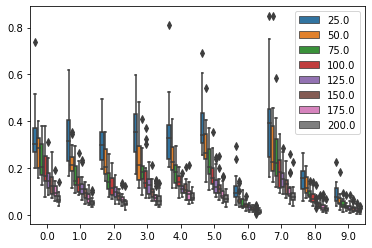

In [83]:
import seaborn as sns

sns.boxplot(x=true_vs_true_EMDs_set[:,0], y=true_vs_true_EMDs_set[:,2], hue=true_vs_true_EMDs_set[:,1])
plt.show()

In [92]:
index1 = true_vs_true_EMDs_set[:,0] == 1
print(index1)
index6 =  true_vs_true_EMDs_set[:,0] == 6
print(index6)

factor1 = true_vs_true_EMDs_set[index1]
factor6 = true_vs_true_EMDs_set[index6]
print(factor1.shape)
factor16 = np.vstack((factor1, factor6))
print(factor16.shape)

[False  True False ... False False False]
[False False False ... False False False]
(160, 3)
(320, 3)


     test  search       emd
0     1.0    25.0  0.234755
1     1.0    25.0  0.280161
2     1.0    25.0  0.467178
3     1.0    25.0  0.403697
4     1.0    25.0  0.337093
..    ...     ...       ...
315   6.0   200.0  0.004655
316   6.0   200.0  0.024937
317   6.0   200.0  0.014743
318   6.0   200.0  0.028823
319   6.0   200.0  0.028108

[320 rows x 3 columns]


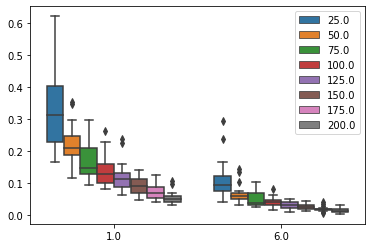

In [95]:
dataset16 = pd.DataFrame({'test': factor16[:,0], 'search': factor16[:,1], 'emd': factor16[:,2]})
print(dataset16)

sns.boxplot(x=factor16[:,0], y=factor16[:,2], hue=factor16[:,1])
plt.show()

[False False False ... False False False]
(200, 3)
     test  search       emd
0     0.0   125.0  0.105251
1     1.0   125.0  0.224349
2     2.0   125.0  0.082740
3     3.0   125.0  0.129488
4     4.0   125.0  0.078603
..    ...     ...       ...
195   5.0   125.0  0.125369
196   6.0   125.0  0.033660
197   7.0   125.0  0.249480
198   8.0   125.0  0.033175
199   9.0   125.0  0.034567

[200 rows x 3 columns]
0.1031368117729085


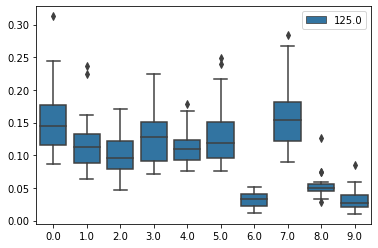

In [100]:
# 125의 mean
index125 = true_vs_true_EMDs_set[:,1] == 125
print(index125)

factor125 = true_vs_true_EMDs_set[index125]
print(factor125.shape)


dataset125 = pd.DataFrame({'test': factor125[:,0], 'search': factor125[:,1], 'emd': factor125[:,2]})
print(dataset125)
print(dataset125['emd'].mean())

sns.boxplot(x=factor125[:,0], y=factor125[:,2], hue=factor125[:,1])
plt.show()

In [15]:
# fake_vs_true_search_range = [5, 10, 25, 50, 75, 100, 125]
# fake_vs_true_EMDs_set = np.zeros((len(fake_vs_true_search_range),num_of_cycle))
# for i in range(len(fake_vs_true_search_range)) :
#     print('i',i)    
#     num_in_cycle_sub = fake_vs_true_search_range[i]
#     fake_vs_true_EMDs_set[i] = EMD_fake_vs_true(test_gen, test_real, num_of_cycle, num_in_cycle, num_in_cycle_sub_1=num_in_cycle_sub, num_in_cycle_sub_2=num_in_cycle_sub, test_gen_sample_num=test_gen_sample_num)

i 0
(8, 6)
(8, 15)
EMD_score for each X factor 0 	 score 0.164960 	 dev -1.103715
EMD_score for each X factor 1 	 score 0.379895 	 dev -0.597159
EMD_score for each X factor 2 	 score 1.381269 	 dev 1.762872
EMD_score for each X factor 3 	 score 0.247548 	 dev -0.909073
EMD_score for each X factor 4 	 score 0.521778 	 dev -0.262768
EMD_score for each X factor 5 	 score 1.144381 	 dev 1.204579
EMD_score for each X factor 6 	 score 0.908140 	 dev 0.647807
EMD_score for each X factor 7 	 score 0.318207 	 dev -0.742543
EMD argsort:  [0 3 7 1 4 6 5 2]
i 1
(8, 6)
(8, 15)
EMD_score for each X factor 0 	 score 0.203432 	 dev -0.856975
EMD_score for each X factor 1 	 score 0.326922 	 dev -0.613178
EMD_score for each X factor 2 	 score 0.334236 	 dev -0.598739
EMD_score for each X factor 3 	 score 0.285491 	 dev -0.694971
EMD_score for each X factor 4 	 score 0.464511 	 dev -0.341546
EMD_score for each X factor 5 	 score 1.835117 	 dev 2.364340
EMD_score for each X factor 6 	 score 0.732641 	 dev

In [16]:
# print(fake_vs_true_EMDs_set)

[[0.16495986 0.37989465 1.38126859 0.24754767 0.52177838 1.1443815  0.90814025 0.31820714]
 [0.20343237 0.32692179 0.3342355  0.28549141 0.46451105 1.83511668 0.73264086 0.91775805]
 [0.2643972  0.34116011 0.34174047 0.35895272 0.29553591 1.28981986 0.70610456 0.90405769]
 [0.42890627 0.38781182 0.42118563 0.1593965  0.26787488 1.03967322 1.52535614 1.05775072]
 [0.31911235 0.47167193 0.39291181 0.31620607 0.4020825  1.72712239 0.70531172 1.13406931]
 [0.27397078 0.4032292  0.44885336 0.27020616 0.23917231 1.32296027 0.7391126  0.85511274]
 [0.29796719 0.38978675 0.30748755 0.26836136 0.42314965 1.31885754 0.69589625 1.27578256]]


In [19]:
# fake_vs_true_EMDs_set

In [26]:
# true_0 = np.array([[0.8266487 , 0.55093051, 1.62765442, 0.17890637, 0.14756212, 0.28398686, 0.63925868, 0.1905602 ],
#        [0.32943756, 0.61558017, 0.29440626, 0.35581493, 0.8408085 , 0.20773761, 0.47052951, 0.33580146],
#        [0.31267713, 0.2992364 , 0.16877917, 0.32970996, 0.14107211, 0.34550035, 0.30393295, 0.56271593],
#        [0.14016112, 0.08764927, 0.18969876, 0.18285475, 0.07962641, 0.14468856, 0.07295444, 0.14522758],
#        [0.20893906, 0.12989758, 0.12435243, 0.21361855, 0.17891435, 0.1476308 , 0.13483269, 0.15815261],
#        [0.1328374 , 0.12050848, 0.08679163, 0.24245635, 0.16820557, 0.14866351, 0.13241014, 0.15785952],
#        [0.09314047, 0.15082961, 0.09961669, 0.15316511, 0.10360745, 0.08921403, 0.11256826, 0.17368485],
#        [0.05376158, 0.06244415, 0.06540703, 0.05359813, 0.11646252, 0.06201199, 0.08826579, 0.06539997],
#        [0.0087301 , 0.08265326, 0.03461872, 0.02708203, 0.07051421, 0.04966067, 0.03067888, 0.04655163]])
# true_1 = np.array([[0.12411692, 0.15100096, 0.57129024, 0.45364378, 1.15260915, 0.33802871, 0.60125745, 0.1196452 ],
#        [0.47029367, 0.18976065, 0.31942932, 0.19092366, 0.39429193, 0.29404448, 0.25634082, 0.22027114],
#        [0.16612979, 0.33487219, 0.10938659, 0.30577304, 0.19564205, 0.32736886, 0.1661468 , 0.1246929 ],
#        [0.2489328 , 0.10308788, 0.17177268, 0.14393284, 0.16338329, 0.12801476, 0.1447183 , 0.12604922],
#        [0.14582181, 0.18209073, 0.15351294, 0.12739879, 0.32017942, 0.13362108, 0.09427326, 0.20688869],
#        [0.13482969, 0.10804191, 0.19704337, 0.12762222, 0.15915649, 0.2004535 , 0.17202813, 0.18257276],
#        [0.06428541, 0.09828846, 0.13385657, 0.12097328, 0.09438638, 0.08945933, 0.15418489, 0.06787365],
#        [0.08140166, 0.07048234, 0.06717345, 0.10910659, 0.08006077, 0.04835756, 0.05998378, 0.04611016],
#        [0.011771  , 0.03855837, 0.04060902, 0.02114135, 0.06398925, 0.01901949, 0.05245652, 0.03804641]])
# true_2 = np.array([[1.00662629, 1.71006815, 0.1451272 , 0.64934461, 0.55612733, 0.37086339, 0.2486387 , 0.92383495],
#        [0.12933557, 0.41590401, 0.23112059, 0.21630368, 0.31832683, 0.13326909, 0.15518149, 0.31658443],
#        [0.30377349, 0.28419041, 0.18610981, 0.42708849, 0.22344453, 0.25896912, 0.32068481, 0.22420297],
#        [0.31869358, 0.21863154, 0.077854  , 0.164133  , 0.12235308, 0.16055981, 0.12023085, 0.12466645],
#        [0.12233714, 0.09951905, 0.28042537, 0.19770483, 0.10263636, 0.17472413, 0.07237753, 0.26292513],
#        [0.04927767, 0.11141288, 0.10258527, 0.09736454, 0.3153179 , 0.0655274 , 0.11345928, 0.10175443],
#        [0.15497969, 0.1250379 , 0.08226601, 0.14811427, 0.10607482, 0.10505833, 0.10287055, 0.09745968],
#        [0.09788062, 0.04930404, 0.04796285, 0.05877151, 0.09426986, 0.12982136, 0.04294029, 0.03868669],
#        [0.01312096, 0.07979615, 0.03516172, 0.02551518, 0.02551047, 0.02592808, 0.02750804, 0.02558031]])
# true_3 = np.array([[0.15609949, 0.22308538, 0.14696255, 0.77718265, 0.37644927, 0.24091543, 0.40525424, 0.55742863],
#        [0.50732069, 0.20103656, 0.31033193, 0.9428812 , 0.48095251, 0.33861402, 0.32384944, 0.28702692],
#        [0.51544672, 0.17923731, 0.41738427, 0.20967902, 0.25430604, 0.18686489, 0.54540353, 0.3810227 ],
#        [0.13468213, 0.18451245, 0.13778576, 0.13222632, 0.52550027, 0.2039808 , 0.34926597, 0.17533179],
#        [0.15556146, 0.17401031, 0.15650177, 0.38609053, 0.15647888, 0.12364359, 0.13766917, 0.16286014],
#        [0.13620173, 0.09208405, 0.15523179, 0.20413416, 0.31360131, 0.13639592, 0.12105336, 0.19139292],
#        [0.06623514, 0.1940104 , 0.1195291 , 0.12680174, 0.06507922, 0.10467962, 0.1755928 , 0.14401417],
#        [0.04964486, 0.06017018, 0.07476765, 0.0415299 , 0.06730805, 0.08678711, 0.0571928 , 0.02902952],
#        [0.00529853, 0.06449941, 0.03200166, 0.02471037, 0.04532804, 0.07026672, 0.07287721, 0.03930425]])
# true_4 = np.array([[3.07626686e-01, 2.42895501e-01, 5.46251787e-01, 2.06185467e-01, 3.96419939e+00, 4.99894562e-01, 2.13822332e-01, 5.06385815e-01],
#        [1.48087742e-01, 3.19477116e-01, 2.89848656e-01, 3.23016114e-01, 3.59403226e-01, 2.93657999e-01, 2.60797318e-01, 3.82965326e-01],
#        [4.61305218e-01, 2.21769631e-01, 4.07700162e-01, 1.31051901e-01, 2.36325595e-01, 2.40512004e-01, 3.83172750e-01, 2.44197909e-01],
#        [1.72608013e-01, 1.93576069e-01, 1.52062276e-01, 2.87428046e-01, 5.59293435e-01, 2.05538114e-01, 1.12631118e-01, 1.74841966e-01],
#        [2.05722906e-01, 1.42009136e-01, 1.55181313e-01, 1.40863413e-01, 1.86672757e-01, 1.20158288e-01, 1.48291642e-01, 8.31958786e-02],
#        [7.62468987e-02, 1.73334723e-01, 9.18560638e-02, 7.54585820e-02, 1.57121043e-01, 7.48363983e-02, 1.47710582e-01, 1.53600200e-01],
#        [6.29001516e-02, 9.08346808e-02, 7.11363985e-02, 8.30371890e-02, 9.12525315e-02, 7.20182859e-02, 1.34376880e-01, 5.01547825e-02],
#        [3.91934021e-02, 1.22989513e-01, 1.07098523e-01, 4.07953564e-02, 3.05822910e-02, 3.49466541e-02, 9.93946102e-02, 8.62766091e-02],
#        [2.74661916e-03, 8.15552237e-02, 3.18549766e-02, 3.22666191e-02, 3.26641118e-02, 2.76753537e-02, 2.47304978e-02, 3.18695266e-02]])

In [30]:
# true_vs_true_hist = np.stack([true_0,true_1,true_2,true_3,true_4])
# print(true_vs_true_hist.shape)

(5, 9, 8)


In [31]:
# np.mean(true_vs_true_hist,axis=0)

array([[0.48422362, 0.5755961 , 0.60745724, 0.45305258, 1.23938945, 0.34673779, 0.42164628, 0.45957096],
       [0.31689505, 0.3483517 , 0.28902735, 0.40578792, 0.4787566 , 0.25346464, 0.29333972, 0.30852986],
       [0.35186647, 0.26386119, 0.257872  , 0.28066048, 0.21015806, 0.27184304, 0.34386817, 0.30736648],
       [0.20301553, 0.15749144, 0.1458347 , 0.18211499, 0.2900313 , 0.16855641, 0.15996014, 0.1492234 ],
       [0.16767648, 0.14550536, 0.17399476, 0.21313522, 0.18897635, 0.13995558, 0.11748886, 0.17480449],
       [0.10587868, 0.12107641, 0.12670162, 0.14940717, 0.22268046, 0.12517535, 0.1373323 , 0.15743597],
       [0.08830817, 0.13180021, 0.10128095, 0.12641832, 0.09208008, 0.09208592, 0.13591868, 0.10663743],
       [0.06437642, 0.07307804, 0.0724819 , 0.0607603 , 0.0777367 , 0.07238493, 0.06955545, 0.05310059],
       [0.00833344, 0.06941248, 0.03484922, 0.02614311, 0.04760122, 0.03851006, 0.04165023, 0.03627043]])

In [32]:
# np.var(true_vs_true_hist,axis=0)

array([[1.31737648e-01, 3.40573951e-01, 2.94332174e-01, 5.59381458e-02, 1.96714397e+00, 7.85018811e-03, 3.06012888e-02, 8.30450236e-02],
       [2.47249683e-02, 2.47321966e-02, 9.52192996e-04, 7.59777181e-02, 3.56407240e-02, 5.41011559e-03, 1.07685375e-02, 2.92024659e-03],
       [1.54164382e-02, 3.12802904e-03, 1.66055807e-02, 1.03797498e-02, 1.55877947e-03, 3.37543472e-03, 1.51757053e-02, 2.29809310e-02],
       [5.00691089e-03, 2.72160466e-03, 1.46435566e-03, 3.07229899e-03, 4.32747310e-02, 9.79955820e-04, 9.49149112e-03, 4.98802388e-04],
       [1.16603742e-03, 9.04317712e-04, 2.97425822e-03, 8.54516386e-03, 5.16629508e-03, 3.93180150e-04, 8.46172181e-04, 3.52134667e-03],
       [1.31322754e-03, 7.67018553e-04, 1.83011016e-03, 4.06092128e-03, 5.62982836e-03, 2.48725654e-03, 4.34132397e-04, 9.80051818e-04],
       [1.23566435e-03, 1.41583332e-03, 5.33439537e-04, 6.19564604e-04, 2.12756661e-04, 1.48948273e-04, 7.09497677e-04, 2.13390569e-03],
       [4.75253659e-04, 6.68557668e-04, 3

In [43]:
# np.int_(np.var(true_vs_true_hist,axis=0) / (np.mean(true_vs_true_hist,axis=0))**2*100)

array([[ 56, 102,  79,  27, 128,   6,  17,  39],
       [ 24,  20,   1,  46,  15,   8,  12,   3],
       [ 12,   4,  24,  13,   3,   4,  12,  24],
       [ 12,  10,   6,   9,  51,   3,  37,   2],
       [  4,   4,   9,  18,  14,   2,   6,  11],
       [ 11,   5,  11,  18,  11,  15,   2,   3],
       [ 15,   8,   5,   3,   2,   1,   3,  18],
       [ 11,  12,   7,  17,  13,  21,   9,  14],
       [ 21,   5,   0,   1,  13,  24,  19,   3]])

In [44]:
# np.sum(np.int_(np.var(true_vs_true_hist,axis=0) / (np.mean(true_vs_true_hist,axis=0))**2*100),axis=1)

array([454, 129,  96, 130,  68,  76,  55, 104,  86])

In [33]:
# fake_0=np.array([[0.18700499, 0.47251477, 1.05303211, 0.25230925, 0.41659449, 1.43821134, 0.58712381, 0.67383894],
#        [0.17685414, 0.49385601, 0.32795885, 0.36486219, 0.25165807, 0.44899168, 0.4572864 , 2.44073191],
#        [0.23006398, 0.26995956, 0.35724655, 0.32751558, 0.50081477, 1.27079516, 0.81081049, 1.17917214],
#        [0.23727282, 0.36951597, 0.4529362 , 0.35443517, 0.29728625, 1.56945358, 1.48390201, 1.56230554],
#        [0.3896225 , 0.35951498, 0.45244789, 0.33242542, 0.23985308, 1.54312235, 0.69567433, 1.46982265],
#        [0.35372962, 0.35517964, 0.47316707, 0.32069745, 0.40391999, 1.31120196, 0.68988275, 1.12765752],
#        [0.23408182, 0.32736043, 0.33750795, 0.29841112, 0.34980731, 1.42052606, 0.79331532, 0.78164182]])
# fake_1=np.array([[0.92040385, 0.75776032, 0.22376045, 0.63215013, 0.91611526, 1.75077897, 0.12272645, 1.19713823],
#        [0.78649246, 0.64632384, 0.3228886 , 0.32303768, 0.23481568, 0.5140977 , 0.83569312, 1.03287726],
#        [0.3083641 , 0.39760312, 0.33203088, 0.24885495, 0.71527661, 1.74074126, 0.69235794, 1.58321071],
#        [0.33558669, 0.31795402, 0.32777372, 0.30877338, 0.32180372, 1.53762714, 0.59202108, 1.14142297],
#        [0.28247296, 0.33865758, 0.34377516, 0.29314115, 0.48658207, 1.07032416, 0.69226418, 1.03393035],
#        [0.25950978, 0.3147941 , 0.42935814, 0.25310621, 0.32304028, 1.43065703, 0.68767732, 1.00621334],
#        [0.31728465, 0.3188075 , 0.39425921, 0.25577921, 0.35805079, 1.60801023, 0.56067706, 1.25558751]])
# fake_2=np.array([[0.85681053, 0.39563843, 0.34107732, 1.29749588, 0.37504497, 0.9152213 , 0.43975533, 0.90052254],
#        [0.38246757, 0.3779858 , 0.37258802, 0.66720909, 0.27905168, 1.2001616 , 0.36302384, 0.37577917],
#        [0.24015333, 0.39352101, 0.3580795 , 0.56554183, 0.26145735, 1.09598073, 0.43038581, 1.0899051 ],
#        [0.23093036, 0.31548135, 0.53692401, 0.2468476 , 0.35314566, 1.31087494, 0.88473824, 0.43796398],
#        [0.35203226, 0.34993141, 0.38115163, 0.19153   , 0.41143523, 1.17866743, 0.81804009, 0.93015771],
#        [0.26243783, 0.33158026, 0.3784587 , 0.24650559, 0.31024645, 1.62393922, 0.72421022, 1.31824919],
#        [0.33652621, 0.31945871, 0.37088323, 0.3048953 , 0.32553832, 1.24842514, 0.57696555, 1.1297387 ]])
# fake_3=np.array([[0.3684392 , 0.60303656, 0.1441518 , 0.39507732, 0.34960099, 0.75556366, 3.28078296, 1.30946766],
#        [0.35367737, 0.36263935, 0.43485882, 1.00631492, 0.56522239, 1.90902956, 0.25866968, 0.31971946],
#        [0.36508686, 0.31865079, 0.40875181, 0.31949726, 0.38078112, 0.66195139, 0.63234041, 1.41499844],
#        [0.31597673, 0.33726658, 0.47416973, 0.31296744, 0.46846052, 1.32020199, 0.80553126, 1.44154925],
#        [0.25219368, 0.28104784, 0.27706788, 0.29517508, 0.31497922, 1.36218096, 0.73782316, 0.89772582],
#        [0.33800563, 0.38618619, 0.3492915 , 0.22870012, 0.3664932 , 1.39360308, 0.68892203, 1.00231802],
#        [0.52495148, 0.36161401, 0.39747889, 0.26444448, 0.28234161, 1.5414254 , 1.22562188, 0.92229323]])
# fake_4=np.array([[0.16495986, 0.37989465, 1.38126859, 0.24754767, 0.52177838, 1.1443815 , 0.90814025, 0.31820714],
#        [0.20343237, 0.32692179, 0.3342355 , 0.28549141, 0.46451105, 1.83511668, 0.73264086, 0.91775805],
#        [0.2643972 , 0.34116011, 0.34174047, 0.35895272, 0.29553591, 1.28981986, 0.70610456, 0.90405769],
#        [0.42890627, 0.38781182, 0.42118563, 0.1593965 , 0.26787488, 1.03967322, 1.52535614, 1.05775072],
#        [0.31911235, 0.47167193, 0.39291181, 0.31620607, 0.4020825 , 1.72712239, 0.70531172, 1.13406931],
#        [0.27397078, 0.4032292 , 0.44885336, 0.27020616, 0.23917231, 1.32296027, 0.7391126 , 0.85511274],
#        [0.29796719, 0.38978675, 0.30748755, 0.26836136, 0.42314965, 1.31885754, 0.69589625, 1.27578256]])

In [34]:
# fake_vs_true_hist = np.stack([fake_0,fake_1,fake_2,fake_3,fake_4])
# print(fake_vs_true_hist.shape)

(5, 7, 8)


In [35]:
# np.mean(fake_vs_true_hist,axis=0)

array([[0.49952369, 0.52176895, 0.62865805, 0.56491605, 0.51582682, 1.20083135, 1.06770576, 0.8798349 ],
       [0.38058478, 0.44154536, 0.35850596, 0.52938306, 0.35905177, 1.18147944, 0.52946278, 1.01737317],
       [0.28161309, 0.34417892, 0.35956984, 0.36407247, 0.43077315, 1.21185768, 0.65439984, 1.23426882],
       [0.30973457, 0.34560595, 0.44259786, 0.27648402, 0.34171421, 1.35556617, 1.05830975, 1.12819849],
       [0.31908675, 0.36016475, 0.36947087, 0.28569554, 0.37098642, 1.37628346, 0.7298227 , 1.09314117],
       [0.29753073, 0.35819388, 0.41582575, 0.26384311, 0.32857445, 1.41647231, 0.70596098, 1.06191016],
       [0.34216227, 0.34340548, 0.36152337, 0.27837829, 0.34777754, 1.42744887, 0.77049521, 1.07300876]])

In [36]:
# np.var(fake_vs_true_hist,axis=0)

array([[1.06315607e-01, 2.01519101e-02, 2.45581403e-01, 1.53696905e-01, 4.35127735e-02, 1.28362929e-01, 1.28828770e+00, 1.28710753e-01],
       [4.76755497e-02, 1.36150338e-02, 1.76376823e-03, 7.51177366e-02, 1.73992023e-02, 3.87771309e-01, 4.82597214e-02, 5.86895442e-01],
       [2.47121922e-03, 2.29161981e-03, 7.00553143e-04, 1.14429095e-02, 2.70608403e-02, 1.21018793e-01, 1.58494782e-02, 5.74679113e-02],
       [5.27399990e-03, 8.18938074e-04, 4.72883071e-03, 4.60756584e-03, 4.80356461e-03, 3.63860616e-02, 1.42142052e-01, 1.53639817e-01],
       [2.37519035e-03, 3.85220769e-03, 3.35393715e-03, 2.42540437e-03, 7.25963721e-03, 5.67570478e-02, 2.20477140e-03, 4.23641477e-02],
       [1.60574166e-03, 1.08253216e-03, 2.07701569e-03, 9.84760950e-04, 3.09481345e-03, 1.27186150e-02, 4.63038438e-04, 2.38901891e-02],
       [9.53942904e-03, 7.83744963e-04, 1.18973037e-03, 3.81934892e-04, 2.11341169e-03, 1.78965105e-02, 5.89406867e-02, 3.70560729e-02]])

In [45]:
# np.int_(np.var(fake_vs_true_hist,axis=0) / (np.mean(fake_vs_true_hist,axis=0))**2*100)

array([[ 42,   7,  62,  48,  16,   8, 113,  16],
       [ 32,   6,   1,  26,  13,  27,  17,  56],
       [  3,   1,   0,   8,  14,   8,   3,   3],
       [  5,   0,   2,   6,   4,   1,  12,  12],
       [  2,   2,   2,   2,   5,   2,   0,   3],
       [  1,   0,   1,   1,   2,   0,   0,   2],
       [  8,   0,   0,   0,   1,   0,   9,   3]])

In [46]:
# np.sum(np.int_(np.var(fake_vs_true_hist,axis=0) / (np.mean(fake_vs_true_hist,axis=0))**2*100),axis=1)

array([312, 178,  40,  42,  18,   7,  21])